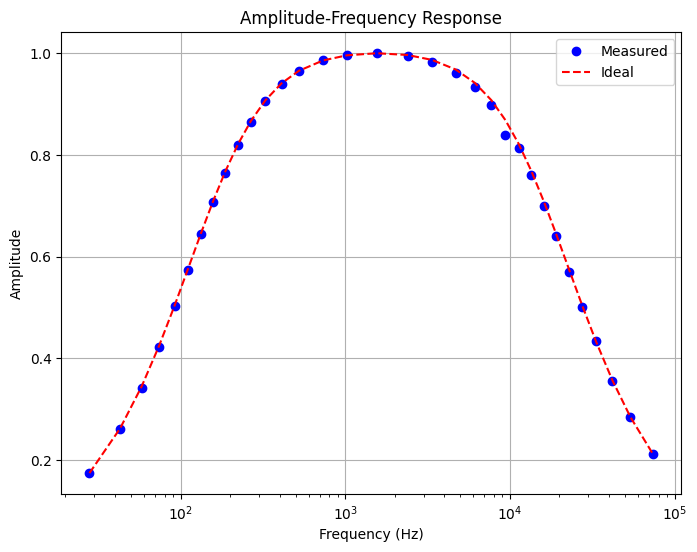

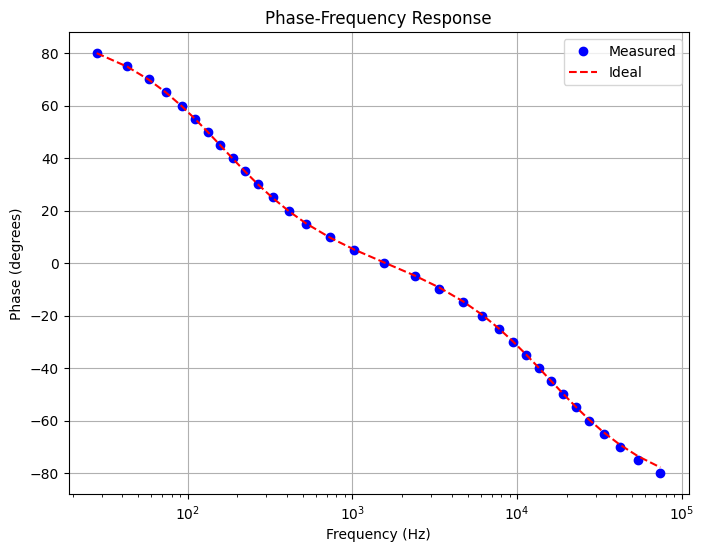

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 从当前目录读取data.xlsx文件
df = pd.read_excel('data.xlsx', sheet_name='freqA')

# 定义实验数据
R = 990
L = 0.01
C = 1e-6
R_L = 14.25
freq=pd.to_numeric(df['f'], errors='coerce')
U_r=pd.to_numeric(df['U_r'], errors='coerce')
U_0=pd.to_numeric(df['U_0'], errors='coerce')
delta_phi=-pd.to_numeric(df['phi'], errors='coerce')
# 计算幅值比A和修正后的幅值比A'
A = U_r / U_0
A_prime = (R + R_L) / R * A

# 计算理想值
w0 = 1 / np.sqrt(L * C)
Q = 1 / (R + R_L) * np.sqrt(L / C)
w = 2 * np.pi * freq
A_ideal = 1 / np.sqrt(1 + Q**2 * (w0/w - w/w0)**2)
phi_ideal = np.arctan(Q * (w0/w - w/w0)) * 180 / np.pi

# 绘制幅频响应曲线

plt.figure(figsize=(8, 6))
plt.semilogx(freq, A_prime, 'bo', label='Measured')
plt.semilogx(freq, A_ideal, 'r--', label='Ideal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude-Frequency Response')
plt.legend()
plt.grid(True)
plt.show()

# 绘制相频响应曲线
plt.figure(figsize=(8, 6))
plt.semilogx(freq, delta_phi, 'bo', label='Measured')
plt.semilogx(freq, phi_ideal, 'r--', label='Ideal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Phase-Frequency Response')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 从当前目录读取data.xlsx文件
df = pd.read_excel('data.xlsx', sheet_name='freqA')

# 定义实验数据
R = 990
L = 0.01
C = 1e-6
R_L = 14.25
freq=pd.to_numeric(df['f'], errors='coerce')
U_r=pd.to_numeric(df['U_r'], errors='coerce')
U_0=pd.to_numeric(df['U_0'], errors='coerce')
phi_exp=-pd.to_numeric(df['phi'], errors='coerce')
f0_exp = 1558
Q_exp = 0.103115

# 计算幅值比A和修正后的幅值比A'
A = U_r / U_0
A_exp = (R + R_L) / R * A


# 定义理论模型函数
def A_theory(f, f0, Q):
    return 1 / np.sqrt(1 + Q**2 * (f0/f - f/f0)**2)

def phi_theory(f, f0, Q):
    return np.arctan(Q * (f0/f - f/f0)) * 180 / np.pi

# 对数据进行曲线拟合
popt_A, _ = curve_fit(A_theory, freq, A_exp, p0=[f0_exp, Q_exp])
popt_phi, _ = curve_fit(phi_theory, freq, phi_exp, p0=[f0_exp, Q_exp])

f0_fit, Q_fit = popt_A
print(f"拟合得到的谐振频率: {f0_fit:.2f} Hz, 品质因数: {Q_fit:.3f}")

# 生成理论曲线数据
freq_theory = np.linspace(min(freq), max(freq), 1000)
A_fit = A_theory(freq_theory, f0_fit, Q_fit)
phi_fit = phi_theory(freq_theory, f0_fit, Q_fit)

# 绘制幅频响应曲线
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(freq, A_exp, 'bo', label='Experimental')
ax1.plot(freq_theory, A_fit, 'r-', label='Fitted')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude Ratio')
ax1.set_xscale('log')
ax1.legend()

# 绘制相频响应曲线
ax2 = ax1.twinx()
ax2.plot(freq, phi_exp, 'go', label='Experimental')
ax2.plot(freq_theory, phi_fit, 'r-', label='Fitted')
ax2.set_ylabel('Phase Difference (deg)')
ax2.legend()

# 绘制带宽横竖线
bandwidth = f0_fit / Q_fit
ax1.axvline(f0_fit - bandwidth/2, color='k', linestyle='--')
ax1.axvline(f0_fit + bandwidth/2, color='k', linestyle='--')
ax1.axhline(1/np.sqrt(2), color='k', linestyle='--')

plt.tight_layout()
plt.show()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

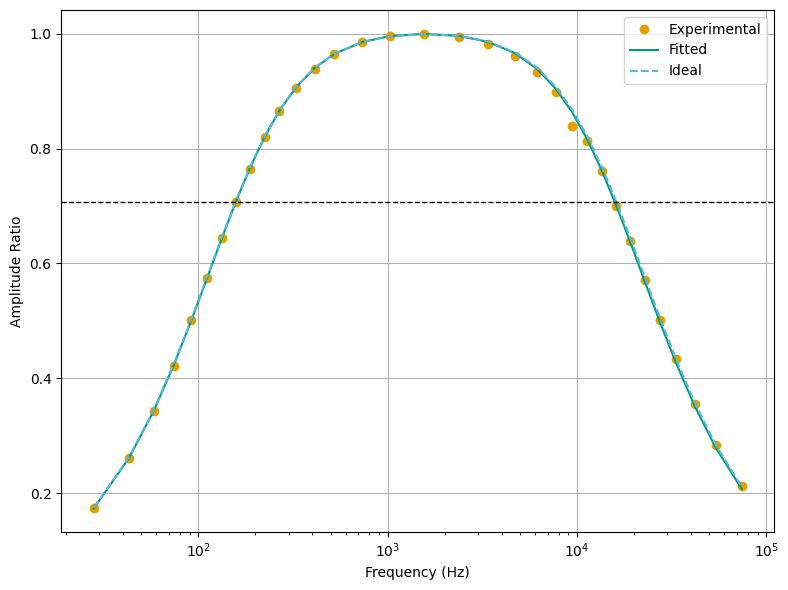

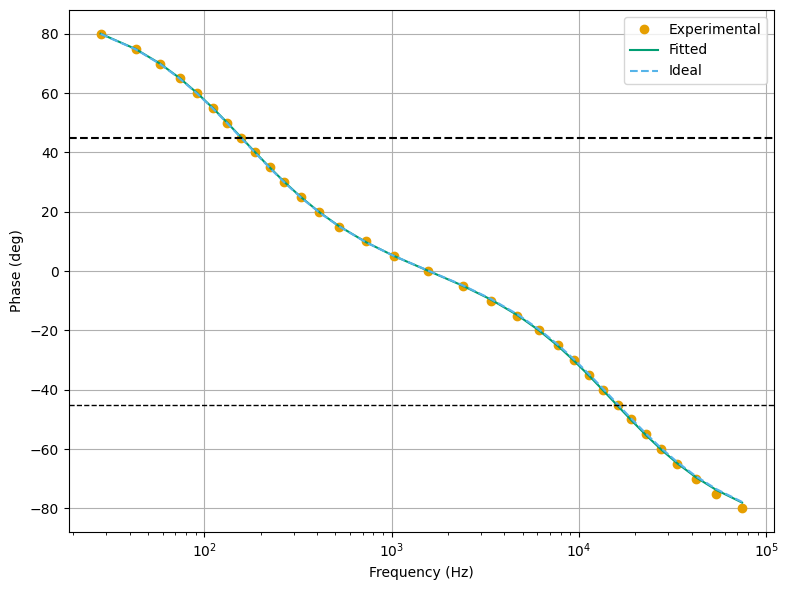

拟合得到的谐振频率: 1580.42 Hz, 品质因数: 0.101


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_excel('data.xlsx', sheet_name='freqA')
# 定义电路数据
R = 990
L = 0.01
C = 1e-6
R_L = 14.25

# 读取实验数据
freq = pd.to_numeric(df['f'], errors='coerce')
U_r = pd.to_numeric(df['U_r'], errors='coerce')
U_0 = pd.to_numeric(df['U_0'], errors='coerce')
phi_exp = -pd.to_numeric(df['phi'], errors='coerce')
f0_exp = 1558
Q_exp = 0.103115

# 计算幅值比A和修正后的幅值比A'
A = U_r / U_0
A_exp = (R + R_L) / R * A



# 定义理论值计算函数
def A_theory(f, f0, Q):
    return 1 / np.sqrt(1 + Q**2 * (f0/f - f/f0)**2)

def phi_theory(f, f0, Q):
    return np.arctan(Q * (f0/f - f/f0)) * 180 / np.pi

# 计算理想值
w0 = 1 / np.sqrt(L * C)
Q = 1 / (R + R_L) * np.sqrt(L / C)
w = 2 * np.pi * freq
A_ideal = 1 / np.sqrt(1 + Q**2 * (w0/w - w/w0)**2)
phi_ideal = np.arctan(Q * (w0/w - w/w0)) * 180 / np.pi

# 定义回归函数
def A_fit(f, f0, Q):
    return A_theory(f, f0, Q)

def phi_fit(f, f0, Q):
    return phi_theory(f, f0, Q)

# 进行数据回归
popt_A, _ = curve_fit(A_fit, freq, A_exp)
popt_phi, _ = curve_fit(phi_fit, freq, phi_exp)

# 计算回归曲线
A_fit_val = A_fit(freq, *popt_A)
phi_fit_val = phi_fit(freq, *popt_phi)


# 定义配色方案
colors = {'exp': '#E69F00', 'theory': '#56B4E9', 'fit': '#009E73', 'bw': '#D55E00'}

# 绘制幅频响应曲线
plt.figure(figsize=(8, 6))
plt.semilogx(freq, A_exp, 'o', label='Experimental', color=colors['exp'])
plt.semilogx(freq, A_fit_val, '-', label='Fitted', color=colors['fit'])
plt.semilogx(freq, A_ideal, '--', label='Ideal', color=colors['theory'])
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Ratio')
plt.legend()
plt.grid(True)

# 绘制带宽横竖线
f1, f2 = popt_A[0] / (1 + 1/(2*popt_A[1])), popt_A[0] * (1 + 1/(2*popt_A[1]))
plt.axvline(f1, color='k', linestyle='--', label='Bandwidth', lw=1)
plt.axvline(f2, color='k', linestyle='--', lw=1)
plt.axhline(max(A_fit_val)/np.sqrt(2), color='k', linestyle='--', lw=1)
plt.tight_layout()
plt.show()

# 绘制相频响应曲线
plt.figure(figsize=(8, 6))
plt.semilogx(freq, phi_exp, 'o', label='Experimental', color=colors['exp'])
plt.semilogx(freq, phi_fit_val, '-', label='Fitted', color=colors['fit'])
plt.semilogx(freq, phi_ideal, '--', label='Ideal', color=colors['theory'])
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (deg)')
plt.legend()
plt.grid(True)

# 绘制带宽横竖线
plt.axvline(f1, color='k', linestyle='--', lw=1)
plt.axvline(f2, color='k', linestyle='--', lw=1)
plt.axhline(-45, color='k', linestyle='--', lw=1)
plt.axhline(45, color='k', linestyle='--')

plt.tight_layout()
plt.show()


f0_fit, Q_fit = popt_A
print(f"拟合得到的谐振频率: {-f0_fit:.2f} Hz, 品质因数: {Q_fit:.3f}")